In [1]:
import cptac
import cptac.utils as u
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
cptac warning: Your version of cptac (0.8.0) is out-of-date. Latest is 0.8.1. Please run 'pip install --upgrade cptac' to update it. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


## Load cancer data

In [2]:
en = cptac.Endometrial()
col = cptac.Colon()
br = cptac.Brca()

## Look at the cis effect of the PIK3CA genes

In [3]:
gene = 'PIK3CA'

# Endometrial

## Pull out all the missense mutation and wildtype tumors for PIK3CA



In [4]:
endo = en.get_genotype_all_vars("PIK3CA")
endo_missense = endo.loc[endo['Mutation'] == "Missense_Mutation"]

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


## Pull out only hotspot mutations

In [5]:
hotspot = endo_missense[(endo_missense.Location.str.contains('E542K'))|(endo_missense.Location.str.contains('E545K'))|(endo_missense.Location.str.contains('H1047R'))]
# hotspot

## Get Wildtype Mutations

In [6]:
wildtype = endo.loc[endo['Mutation'] == "Wildtype_Tumor"]
result = pd.concat([hotspot, wildtype])

## Get proteomics for IDH3A

In [9]:
prot = en.get_proteomics()
# prot = prot["HSPE1-MOB4"]

## Join proteomics to mutation

In [10]:
joined = result.join(prot)

## Drop unnecessary columns

In [11]:
endo_missense = joined.drop(columns=['Location', 'Mutation_Status'])
# endo_missense

# Brca

In [12]:
brca = br.get_genotype_all_vars("PIK3CA")
brca_missense = brca.loc[brca['Mutation'] == "Missense_Mutation"]

hotspot = brca_missense[(brca_missense.Location.str.contains('E542K'))|(brca_missense.Location.str.contains('E545K'))|(brca_missense.Location.str.contains('H1047R'))]

wildtype = brca.loc[brca['Mutation'] == "Wildtype_Tumor"]
result = pd.concat([hotspot, wildtype])

prot = br.get_proteomics()
prot = cptac.utils.reduce_multiindex(prot, "Database_ID")
prot = prot["HSPE1-MOB4"]
prot

joined = result.join(prot)

brca_missense = joined.drop(columns=['Location', 'Mutation_Status'])
brca_missense

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


,Mutation,HSPE1-MOB4
Patient_ID,,
CPT001846,Missense_Mutation,-0.5692
X11BR004,Missense_Mutation,-0.1798
X11BR013,Missense_Mutation,-0.9715
X11BR014,Missense_Mutation,-1.7573
X11BR022,Missense_Mutation,-1.2231
...,...,...
X15BR003,Wildtype_Tumor,0.5469
X18BR004,Wildtype_Tumor,0.1627
X18BR006,Wildtype_Tumor,1.4004


In [13]:
brca_missense["cancer"] = "brca"

In [ ]:
# # pancancer cis plot
# df = brca_missense
# gene = 'HSPE1-MOB4'
# plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
# sns.set(font_scale = 1.2)

# boxplot = sns.boxplot(x='cancer', y=gene, data = df, hue = 'Mutation',
#                       hue_order = ["Wildtype_Tumor", "Missense_Mutation"], showfliers = False)    
# boxplot.set_title('Pancancer cis Effect of PIK3CA Hotspot Mutations')
# boxplot = sns.stripplot(x='cancer', y=gene, data = df, jitter = True, 
#                            color = ".3", hue = 'Mutation', hue_order = ["Wildtype_Tumor", "Missense_Mutation"], dodge = True)
# boxplot.set(xlabel = "\nPTEN Wildtype/Hotspot_Mutation", ylabel = gene+"_proteomics")

# # format legend
# handles, labels = boxplot.get_legend_handles_labels()
# plt.legend(handles, ['Wildtype', 'Hotspot_Mutation'])



# plt.show()
# plt.clf()
# plt.close()

# Colon

In [15]:
colon = col.get_genotype_all_vars("PIK3CA")
colon_missense = colon.loc[colon['Mutation'] == "nonsynonymous SNV"]
hotspot = colon_missense[(colon_missense.Location.str.contains('E542K'))|(colon_missense.Location.str.contains('E545K'))|(colon_missense.Location.str.contains('H1047R'))]

wildtype = colon.loc[colon['Mutation'] == "Wildtype_Tumor"]
result = pd.concat([hotspot, wildtype])

prot = col.get_proteomics()
prot = prot["IDH3A"]

joined = result.join(prot)

colon_missense = joined.drop(columns=['Location', 'Mutation_Status'])
colon_missense

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


,Mutation,IDH3A
Patient_ID,,
05CO028,nonsynonymous SNV,-0.0211
05CO032,nonsynonymous SNV,-0.3450
09CO005,nonsynonymous SNV,0.0496
11CO027,nonsynonymous SNV,-0.2080
11CO052,nonsynonymous SNV,-0.0698
...,...,...
20CO001,Wildtype_Tumor,-0.1800
20CO003,Wildtype_Tumor,-0.0636
22CO004,Wildtype_Tumor,0.4960


# Final Graph

## Reformat dataframes

In [16]:
endo_missense = endo_missense.assign(cancer = 'Endometrial')
brca_missense = brca_missense.assign(cancer = 'Brca')
colon_missense = colon_missense.assign(cancer = 'Colon')
colon_missense["Mutation"] = colon_missense["Mutation"].replace("nonsynonymous SNV", "Missense_Mutation")

In [17]:
endo_missense.head()

Name,Mutation,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,...,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,Missense_Mutation,-1.180,-0.863,-0.802,0.222,0.2560,0.665,1.2800,-0.33900,0.412,...,NaN,0.0229,0.109,NaN,-0.332,-0.4330,-1.020,-0.1230,-0.0859,Endometrial
C3L-00032,Missense_Mutation,-0.528,-1.320,0.435,NaN,-0.2400,1.040,-0.0213,-0.04790,0.419,...,-0.1450,0.0105,-0.116,NaN,0.151,-0.0740,-0.540,0.3200,-0.4190,Endometrial
C3L-00362,Missense_Mutation,-0.924,-0.445,1.570,-0.678,0.1730,0.436,0.2270,-0.00248,0.479,...,NaN,0.1080,-0.153,NaN,0.109,-0.3360,-0.822,-0.0338,0.1210,Endometrial
C3L-00601,Missense_Mutation,-0.454,-0.242,NaN,NaN,0.2580,0.219,-0.2490,-1.33000,0.204,...,NaN,0.6670,1.300,0.441,0.130,-0.0659,-0.923,-0.1630,0.1120,Endometrial
C3L-00605,Missense_Mutation,-0.240,0.594,3.400,0.154,0.0932,0.283,-0.0789,-0.61100,0.370,...,-0.0136,0.2140,0.683,0.433,-0.208,-0.3470,-0.911,0.0692,-0.2320,Endometrial


In [18]:
brca_missense.head()

,Mutation,HSPE1-MOB4,cancer
Patient_ID,,,
CPT001846,Missense_Mutation,-0.5692,Brca
X11BR004,Missense_Mutation,-0.1798,Brca
X11BR013,Missense_Mutation,-0.9715,Brca
X11BR014,Missense_Mutation,-1.7573,Brca
X11BR022,Missense_Mutation,-1.2231,Brca


In [19]:
colon_missense.head(10)

,Mutation,IDH3A,cancer
Patient_ID,,,
05CO028,Missense_Mutation,-0.0211,Colon
05CO032,Missense_Mutation,-0.3450,Colon
09CO005,Missense_Mutation,0.0496,Colon
11CO027,Missense_Mutation,-0.2080,Colon
11CO052,Missense_Mutation,-0.0698,Colon
11CO062,Missense_Mutation,-0.5540,Colon
16CO006,Missense_Mutation,0.1140,Colon
16CO012,Missense_Mutation,NaN,Colon
20CO004,Missense_Mutation,-0.7950,Colon


## Join all the cancer data tables together.
This is the one we will use to make the graph

In [20]:
df = endo_missense.append(brca_missense)
df = df.append(colon_missense)
df

,Mutation,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,...,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer,HSPE1-MOB4
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,Missense_Mutation,-1.180,-0.863,-0.802,0.222,0.2560,0.665,1.2800,-0.33900,0.412,...,0.0229,0.109,NaN,-0.332,-0.4330,-1.020,-0.1230,-0.0859,Endometrial,NaN
C3L-00032,Missense_Mutation,-0.528,-1.320,0.435,NaN,-0.2400,1.040,-0.0213,-0.04790,0.419,...,0.0105,-0.116,NaN,0.151,-0.0740,-0.540,0.3200,-0.4190,Endometrial,NaN
C3L-00362,Missense_Mutation,-0.924,-0.445,1.570,-0.678,0.1730,0.436,0.2270,-0.00248,0.479,...,0.1080,-0.153,NaN,0.109,-0.3360,-0.822,-0.0338,0.1210,Endometrial,NaN
C3L-00601,Missense_Mutation,-0.454,-0.242,NaN,NaN,0.2580,0.219,-0.2490,-1.33000,0.204,...,0.6670,1.300,0.441,0.130,-0.0659,-0.923,-0.1630,0.1120,Endometrial,NaN
C3L-00605,Missense_Mutation,-0.240,0.594,3.400,0.154,0.0932,0.283,-0.0789,-0.61100,0.370,...,0.2140,0.683,0.433,-0.208,-0.3470,-0.911,0.0692,-0.2320,Endometrial,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20CO001,Wildtype_Tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colon,NaN
20CO003,Wildtype_Tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colon,NaN
22CO004,Wildtype_Tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colon,NaN


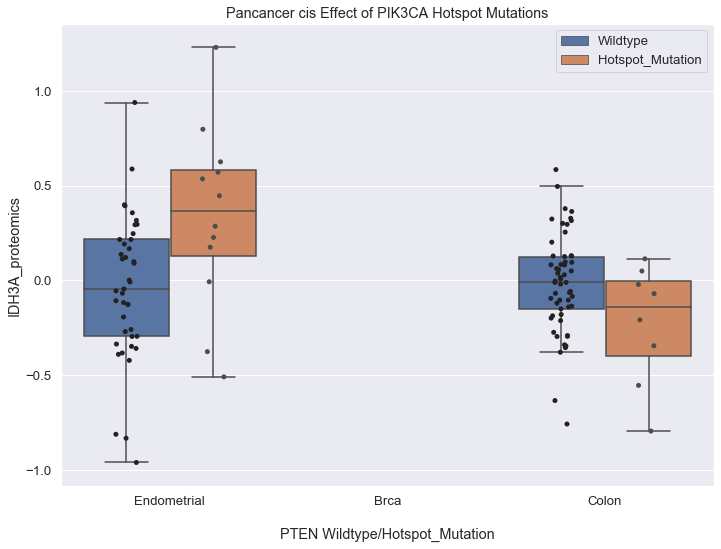

In [21]:
# pancancer cis plot
gene = 'IDH3A'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='cancer', y=gene, data = df, hue = 'Mutation',
                      hue_order = ["Wildtype_Tumor", "Missense_Mutation"], showfliers = False)    
boxplot.set_title('Pancancer cis Effect of PIK3CA Hotspot Mutations')
boxplot = sns.stripplot(x='cancer', y=gene, data = df, jitter = True, 
                           color = ".3", hue = 'Mutation', hue_order = ["Wildtype_Tumor", "Missense_Mutation"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Hotspot_Mutation", ylabel = gene+"_proteomics")

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles, ['Wildtype', 'Hotspot_Mutation'])



plt.show()
plt.clf()
plt.close()

In [ ]:
# fig = boxplot.get_figure()
# fig.savefig("cis_effects_proteomics.png")